In [1]:
!pwd

/home/santanu-das/Downloads


In [2]:
!ls

 100000.png
 10000.png
 1001950.pdf
 1002.1368.pdf
 100.png
'1691940854070(1).jpg'
'1691940854070(1).png'
 1691940854070.png
 1692092166017.jpg
'1695012388584(1).jpg'
'1695012388584(2).jpg'
 1695012388584.jpg
 1695012572143.jpg
 1695012674155.jpg
'2023_10_22 10_07 am Office Lens(1).jpg'
'2023_10_22 10_07 am Office Lens.jpg'
 2301.06677.pdf
 2308.08284.pdf
'563dfe42-1c27-4e41-81b9-ab4ed7501955_payment_confirmation_202308224-033558(1).png'
 563dfe42-1c27-4e41-81b9-ab4ed7501955_payment_confirmation_202308224-033558.png
 BF02702273.pdf
 BF02933588.pdf
 BF03012189.pdf
 Brightness-temperature-of-the-21cm-line-seen-relative-to-the-CMB-temperature-The.jpg
 caste_certificate.pdf
 cfitsio-4.3.0.tar.gz
 ch4.pdf
 concat_mstransform_export.py
'Copy of Electric vs temp.xlsx'
'Copy of Resume1.pdf'
'Copy of Untitled_spreadsheet(1)(1).xlsx'
'Copy of Untitled_spreadsheet(1)(2).xlsx'
'Copy of Untitled_spreadsheet(1).xlsx'
 DLAs.pdf
'Doc1(1).docx'
 Doc1.docx
 DOC-20230908-WA0040..pdf
 Dodelson_MC.pdf
'Ele

### 

In [ ]:
!sudo apt install python3-astropy

[sudo] password for santanu-das: 

IOStream.flush timed out


In [1]:
# %load read_fits_new.py
# By Dr. Akash Patwa, PhD, 007akashpatwa@gmail.com

#Construction of exported visibility file (using exportuvfits) is in AIPS standard FITS format, Random group form (look in attached pdf by AIPS, AIPSMEM117.pdf).
#Note: Indexing starts from 0 in any array or column
import astropy
from astropy.table import Table
from astropy.io import fits
import numpy as np
from matplotlib.colors import LogNorm
import os

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'astropy'

In [4]:
#filename = "/lfs1/usrscratch/phd/ph22d020/drift_ph2_day00/data_cutoff/1000009480.fits"
filename = "/home/santanu-das/ZW3_IFRQ_0000.uvf"

In [5]:
#wl = 1.945  # wavelength
#time_chunk = 11  # no. of integrations in each file

#If we don't want to see header and other details of FITS file, we can directly get data as :
#data = fits.getdata(filename)
#dataT = Table(data) 				#to covert in Table form

'''
dataT['UU'] = dataT['UU']*3.e8/wl	   # to convert in meters, works either in array form or Table form
dataT['VV'] = dataT['VV']*3.e8/wl      # to convert in meters, works either in array form or Table form
dataT['WW'] = dataT['WW']*3.e8/wl      # to convert in meters, works either in array form or Table form
'''

#bl = len(dataT['UU'])/time_chunk

"\ndataT['UU'] = dataT['UU']*3.e8/wl\t   # to convert in meters, works either in array form or Table form\ndataT['VV'] = dataT['VV']*3.e8/wl      # to convert in meters, works either in array form or Table form\ndataT['WW'] = dataT['WW']*3.e8/wl      # to convert in meters, works either in array form or Table form\n"

In [6]:
hdulist = fits.open(filename)
print(len(hdulist))
#print(hdulist)

#fits.info('1000009480.fits') 				#to check different headers
print(hdulist[0].header) 			# Primary: to check info of primary header which has the desired data
#print(hdulist[1].header)				#AIPS FQ: contains info about frequency channels, central frequency, bandwidth etc.
#print(hdulist[2].header)				#AIPS AN: contains info about antenna names, telescope name etc
#data = hdulist[0].data 				#to save visibilities in data
#dataT = Table(data)     			#to convert data from array form to table form, readable
#hdulist.close()

#dataT[0] #to access first row of the table, e.g. output
#    UU           VV           WW          DATE       _DATE     BASELINE FREQSEL  SOURCE  INTTIM   DATA [1,1,1,48,4,3]
#  float32      float32      float32      float32     float32   float32  float32 float32 float32       float32
#------------ ------------ ------------ ----------- ----------- -------- ------- ------- ------- ------------------
#    0.0          0.0          0.0     2.45663e+06   0.000520833  257.0     1.0     1.0     10.0        0.0 .. -11.4706

#units and meaning of each column names are given in the attached pdf file, AIPSMEM117.pdf.
#print dataT['UU']  					#to print UU data (in light seconds), can be done for any other column
#dataT['UU'] = dataT['UU']*3.e8	      #to convert in meters, works either in array form or Table form

# We can do manipulations of columns either in Table form or in array form, as done above. Manipulations done directly on array or column is faster than using loops.
#Visibility data is usually stored in last column of hdulist[0].data or dataT. Visibility column is of dimansion (1x1x1x48x4x3), where
#48 corresponds to number of channels available,
#4 corresponds to different polarizations XX, YY, XY, and YX,
#3 corresponds to (of XX, YY, XY, or YX) first; real part of visibility, 2nd; imaginary part of visibility, and 3rd: corresponding weighting

#Note: Visibilities, XX, YY, XY, YX are not in polar form but in (a+ib) form.

3
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -32 / array data type                                NAXIS   =                    7 / number of array dimensions                     NAXIS1  =                    0                                                  NAXIS2  =                    3                                                  NAXIS3  =                    4                                                  NAXIS4  =                  768                                                  NAXIS5  =                    1                                                  NAXIS6  =                    1                                                  NAXIS7  =                    1                                                  EXTEND  =                    T                                                  GROUPS  =                    T / has groups                                     PCOUNT  =                    7 / numbe

In [7]:
freq0 = hdulist[0].header['CRVAL4'] 

In [8]:
#print(hdulist[1].header)

In [9]:
#print(hdulist[2].header)

In [10]:
data = hdulist[0].data

In [11]:
#data[0]

In [12]:
dataT = Table(data)

In [13]:
#print(dataT['UU'])

In [14]:
print(dataT['DATA'].shape)

(86625, 1, 1, 1, 768, 4, 3)


In [15]:
#print(dataT['VV'])

In [16]:
dataT

UU,VV,WW,DATE,_DATE,BASELINE,FREQSEL,"DATA [1,1,1,768,4,3]"
float32,float32,float32,float32,float32,float32,float32,float32
-1.8151471e-07,-1.4728191e-08,-8.6080676e-10,2457674.0,0.19587962,258.0,1.0,0.49948058 .. -1.611904
-2.0438443e-07,-8.460011e-10,-9.335367e-10,2457674.0,0.19587962,259.0,1.0,0.20952359 .. -1.9506866
-2.3713966e-07,2.4446575e-08,-8.6285046e-10,2457674.0,0.19587962,260.0,1.0,-0.08158925 .. -2.2677088
-2.0967269e-07,5.7753866e-08,-1.0298896e-09,2457674.0,0.19587962,261.0,1.0,-0.052163962 .. -2.2444112
-1.5836491e-07,7.234965e-08,-7.7438417e-10,2457674.0,0.19587962,262.0,1.0,-0.19866532 .. -1.6699513
-1.883202e-07,7.836099e-08,-8.0529833e-10,2457674.0,0.19587962,263.0,1.0,-0.027097551 .. -1.8600729
-4.969184e-09,1.5191137e-07,-6.701095e-10,2457674.0,0.19587962,264.0,1.0,0.19439828 .. -1.7394903
-5.614957e-08,-5.6071503e-08,4.4503207e-11,2457674.0,0.19587962,265.0,1.0,0.19099343 .. -1.3743129
-3.3058296e-08,-3.2327485e-08,-1.4806672e-11,2457674.0,0.19587962,266.0,1.0,-0.003983986 .. -1.9274487


In [17]:
UU = dataT['UU']*freq0 #for baseline unit   #*3.e8 (for meter unit)
VV = dataT['VV']*freq0   

Text(0, 0.5, 'VV')

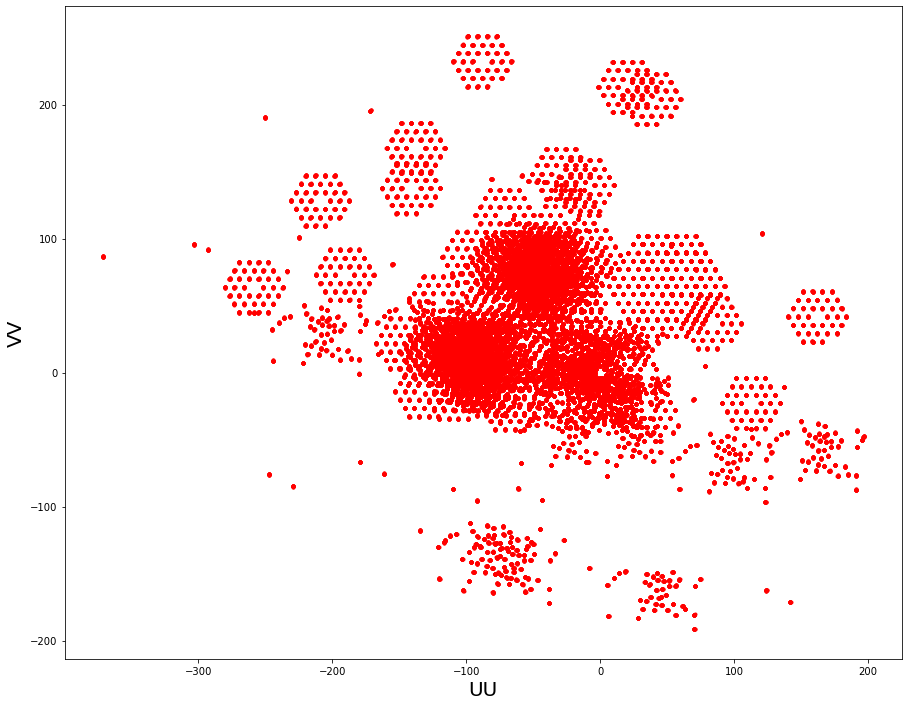

In [18]:
plt.figure(figsize=(15,12)) 
plt.plot(UU, VV,'.', color = 'red')

plt.xlabel("UU", fontsize = 20)
plt.ylabel("VV", fontsize = 20)

In [19]:
#print(dataT['DATA'].shape)

In [20]:
bl = 100
pol = 0
vis_allfreq_XX_re = dataT['DATA'][bl,0,0,0,:,pol,0] #array with 768R & 7C
vis_allfreq_XX_im = dataT['DATA'][bl,0,0,0,:,pol,1] #array with 768R & 7C


In [21]:
vis_allfreq_XX_im.shape

(768,)

In [22]:
pix   = hdulist[0].header['CRPIX4']
delta = hdulist[0].header['CDELT4']
mfreq =  hdulist[0].header['CRVAL4']
nfreq = hdulist[0].header['NAXIS4']

In [23]:
idx = np.arange(nfreq)
freqs = (idx - pix) * delta + mfreq

In [24]:
#def f_N(N):
      
 #    Q = (((N - pix)*delta) + mfreq)
    
 #    return(Q)   
    
#print(f_N(767))
#Freq_N = np.zeros(768)   

#for i in range(len(Freq_N)):

#        Freq_N[i] = f_N(i)

In [25]:
#plt.figure(figsize=(15,12))
#plt.plot(freqs,vis_allfreq_XX_re)
#plt.plot(freqs,vis_allfreq_XX_im)
#plt.legend(["Re", "Im"], loc ="lower right",prop = {'size' : 20})
#plt.xlabel('Freq (Hz)',fontsize = 20)
#plt.ylabel('Vis',fontsize = 20)'''

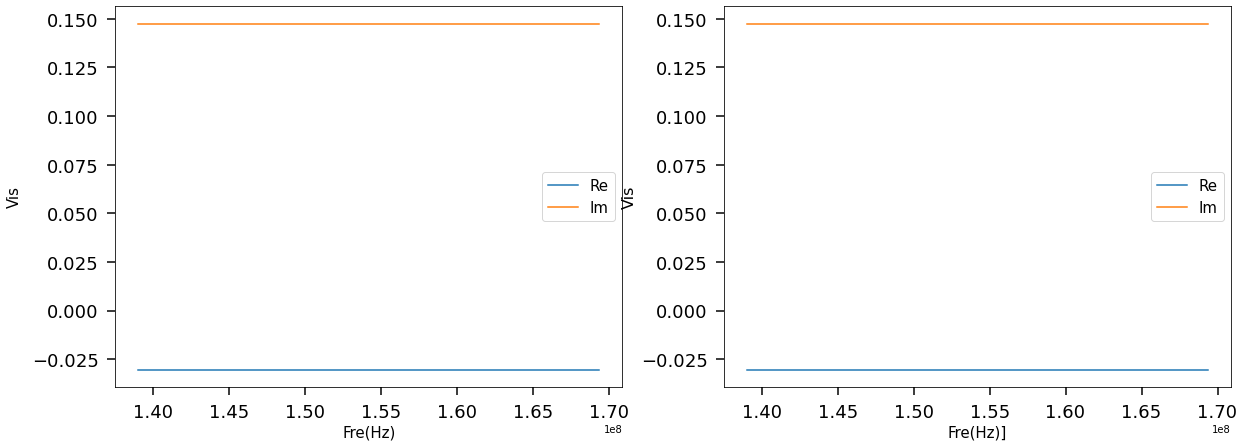

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

freqs = (idx - pix) * delta + mfreq

bl = 500; pol = 0
vis_allfreq_XX_re = dataT['DATA'][bl,0,0,0,:,pol,0] #array with 768R & 7C
vis_allfreq_XX_im = dataT['DATA'][bl,0,0,0,:,pol,1] #array with 768R & 7C
vis_allfreq_XX_wt = dataT['DATA'][bl,0,0,0,:,pol,2] 


vis_allfreq_XX_re = vis_allfreq_XX_re[vis_allfreq_XX_wt > 0.]
vis_allfreq_XX_im = vis_allfreq_XX_im[vis_allfreq_XX_wt > 0.]
freqs = freqs[vis_allfreq_XX_wt > 0.]

ax[0].plot(freqs,vis_allfreq_XX_re,label = 'Re')
ax[0].plot(freqs,vis_allfreq_XX_im, label = 'Im')

#ax[0].set_xlim([0.,np.rad2deg(1.)])
ax[0].set_ylabel('Vis', fontsize=15,labelpad=10)
#ax[0].text(1.55e8, -150,r'XX ; bl = 500', fontsize=20)
#ax[0].text(1.45e8, -150,r'cutoff', fontsize=20)
ax[0].set_xlabel(r'Fre(Hz)', fontsize=15)
#ax[0].set_yscale('log')
ax[0].legend(fontsize=15)
ax[0].tick_params(axis='both', which='major', labelsize=18, size=8., width=1.5, pad=8.)
ax[0].tick_params(axis='both', which='minor', labelsize=18, size=5., width=1.5, pad=8.)



freqs = (idx - pix) * delta + mfreq
bl = 500; pol = 1
vis_allfreq_YY_re = dataT['DATA'][bl,0,0,0,:,pol,0] #array with 768R & 7C
vis_allfreq_YY_im = dataT['DATA'][bl,0,0,0,:,pol,1] #array with 768R & 7C
vis_allfreq_YY_wt = dataT['DATA'][bl,0,0,0,:,pol,2] 


vis_allfreq_YY_re = vis_allfreq_YY_re[vis_allfreq_YY_wt > 0.]
vis_allfreq_YY_im = vis_allfreq_YY_im[vis_allfreq_YY_wt > 0.]
freqs = freqs[vis_allfreq_YY_wt > 0.]

ax[1].plot(freqs,vis_allfreq_YY_re,label = 'Re')
ax[1].plot(freqs,vis_allfreq_YY_im, label = 'Im')
#ax[1].text(1.55e8, 120 ,r'YY ; bl = 500' + os.linesep + 'cutoff', fontsize=20)
ax[1].set_ylabel('Vis', fontsize=16)
ax[1].set_xlabel(r'Fre(Hz)]', fontsize=15)
#ax[1].set_yscale('log')
ax[1].legend(fontsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=18, size=8., width=1.5, pad=8.)
ax[1].tick_params(axis='both', which='minor', labelsize=18, size=5., width=1.5, pad=8.)


'''freqs = (idx - pix) * delta + mfreq
bl = 100; pol = 2
vis_allfreq_XX_re = dataT['DATA'][bl,0,0,0,:,pol,0] #array with 768R & 7C
vis_allfreq_XX_im = dataT['DATA'][bl,0,0,0,:,pol,1] #array with 768R & 7C
vis_allfreq_XX_wt = dataT['DATA'][bl,0,0,0,:,pol,2] 


vis_allfreq_XX_re = vis_allfreq_XX_re[vis_allfreq_XX_wt > 0.]
vis_allfreq_XX_im = vis_allfreq_XX_im[vis_allfreq_XX_wt > 0.]
freqs = freqs[vis_allfreq_XX_wt > 0.]

ax[1,0].plot(freqs,vis_allfreq_XX_re,label = 'Re')
ax[1,0].plot(freqs,vis_allfreq_XX_im, label = 'Im')

#ax[1,0].set_xlim([0.,np.rad2deg(1.)])
ax[1,0].set_ylabel('Vis', fontsize=15,labelpad=10)
#ax[1,0].text(2, 0.5e-3,r'Symmetric beam', fontsize=20)
ax[1,0].set_xlabel(r'Freq(Hz)', fontsize=15)
#ax[1,0].set_yscale('log')
ax[1,0].legend(fontsize=15)
ax[1,0].tick_params(axis='both', which='major', labelsize=18, size=8., width=1.5, pad=8.)
ax[1,0].tick_params(axis='both', which='minor', labelsize=18, size=5., width=1.5, pad=8.)


freqs = (idx - pix) * delta + mfreq
bl = 100; pol = 3
vis_allfreq_XX_re = dataT['DATA'][bl,0,0,0,:,pol,0] #array with 768R & 7C
vis_allfreq_XX_im = dataT['DATA'][bl,0,0,0,:,pol,1] #array with 768R & 7C
vis_allfreq_XX_wt = dataT['DATA'][bl,0,0,0,:,pol,2] 


vis_allfreq_XX_re = vis_allfreq_XX_re[vis_allfreq_XX_wt > 0.]
vis_allfreq_XX_im = vis_allfreq_XX_im[vis_allfreq_XX_wt > 0.]
freqs = freqs[vis_allfreq_XX_wt > 0.]


ax[1,1].plot(freqs,vis_allfreq_XX_re,label = 'Re')
ax[1,1].plot(freqs,vis_allfreq_XX_im, label = 'Im')

#ax[1,1].set_xlim([0.,np.rad2deg(1.)])
ax[1,1].set_ylabel('Vis', fontsize=15,labelpad=10)
#ax[1,1].text(2, 0.5e-3,r'Symmetric beam', fontsize=20)
ax[1,1].set_xlabel(r'Freq(Hz)', fontsize=15)
#ax[1,1].set_yscale('log')
ax[1,1].legend(fontsize=15)
ax[1,1].tick_params(axis='both', which='major', labelsize=18, size=8., width=1.5, pad=8.)
ax[1,1].tick_params(axis='both', which='minor', labelsize=18, size=5., width=1.5, pad=8.)'''

plt.savefig('bl = 500; cutoff.pdf',bbox_inches='tight')

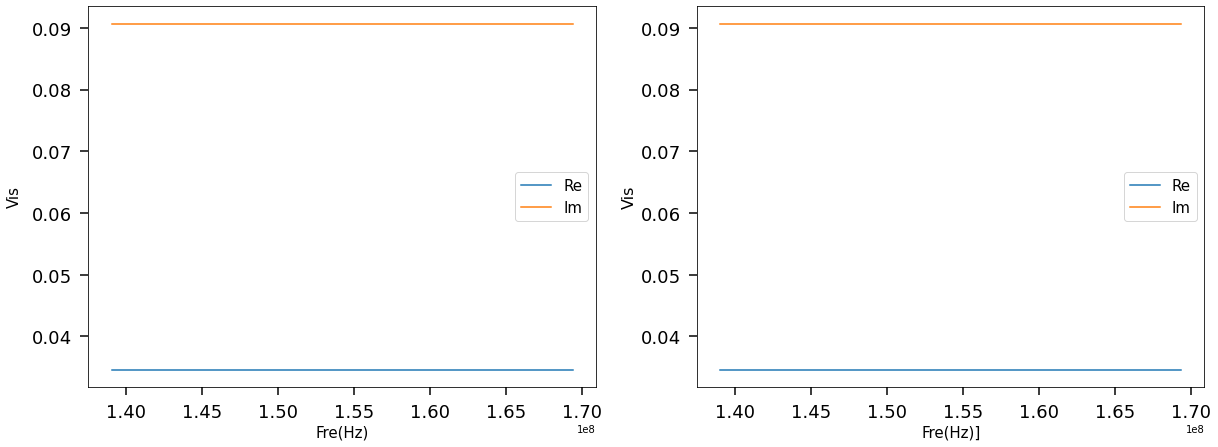

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

freqs = (idx - pix) * delta + mfreq

bl = 10000; pol = 0
vis_allfreq_XX_re = dataT['DATA'][bl,0,0,0,:,pol,0] #array with 768R & 7C
vis_allfreq_XX_im = dataT['DATA'][bl,0,0,0,:,pol,1] #array with 768R & 7C
vis_allfreq_XX_wt = dataT['DATA'][bl,0,0,0,:,pol,2] 


vis_allfreq_XX_re = vis_allfreq_XX_re[vis_allfreq_XX_wt > 0.]
vis_allfreq_XX_im = vis_allfreq_XX_im[vis_allfreq_XX_wt > 0.]
freqs = freqs[vis_allfreq_XX_wt > 0.]

ax[0].plot(freqs,vis_allfreq_XX_re,label = 'Re')
ax[0].plot(freqs,vis_allfreq_XX_im, label = 'Im')

#ax[0].set_xlim([0.,np.rad2deg(1.)])
ax[0].set_ylabel('Vis', fontsize=15,labelpad=10)
#ax[0].text(1.50e8, 200,r'XX ; bl = 10000 ', fontsize=20)
#ax[0].text(1.50e8, -150,r'cutoff', fontsize=20)
ax[0].set_xlabel(r'Fre(Hz)', fontsize=15)
#ax[0].set_yscale('log')
ax[0].legend(fontsize=15)
ax[0].tick_params(axis='both', which='major', labelsize=18, size=8., width=1.5, pad=8.)
ax[0].tick_params(axis='both', which='minor', labelsize=18, size=5., width=1.5, pad=8.)

freqs = (idx - pix) * delta + mfreq
bl = 10000; pol = 1
vis_allfreq_YY_re = dataT['DATA'][bl,0,0,0,:,pol,0] #array with 768R & 7C
vis_allfreq_YY_im = dataT['DATA'][bl,0,0,0,:,pol,1] #array with 768R & 7C
vis_allfreq_YY_wt = dataT['DATA'][bl,0,0,0,:,pol,2] 


vis_allfreq_YY_re = vis_allfreq_YY_re[vis_allfreq_YY_wt > 0.]
vis_allfreq_YY_im = vis_allfreq_YY_im[vis_allfreq_YY_wt > 0.]
freqs = freqs[vis_allfreq_YY_wt > 0.]

ax[1].plot(freqs,vis_allfreq_YY_re,label = 'Re')
ax[1].plot(freqs,vis_allfreq_YY_im, label = 'Im')
#ax[1].text(1.455e8, -160,r'YY ; bl = 10000' + os.linesep + 'cutoff', fontsize=20)
ax[1].set_ylabel('Vis', fontsize=16)
ax[1].set_xlabel(r'Fre(Hz)]', fontsize=15)
#ax[1].set_yscale('log')
ax[1].legend(fontsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=18, size=8., width=1.5, pad=8.)
ax[1].tick_params(axis='both', which='minor', labelsize=18, size=5., width=1.5, pad=8.)


'''freqs = (idx - pix) * delta + mfreq
bl = 10000; pol = 2
vis_allfreq_XX_re = dataT['DATA'][bl,0,0,0,:,pol,0] #array with 768R & 7C
vis_allfreq_XX_im = dataT['DATA'][bl,0,0,0,:,pol,1] #array with 768R & 7C
vis_allfreq_XX_wt = dataT['DATA'][bl,0,0,0,:,pol,2] 


vis_allfreq_XX_re = vis_allfreq_XX_re[vis_allfreq_XX_wt > 0.]
vis_allfreq_XX_im = vis_allfreq_XX_im[vis_allfreq_XX_wt > 0.]
freqs = freqs[vis_allfreq_XX_wt > 0.]

ax[1,0].plot(freqs,vis_allfreq_XX_re,label = 'Re')
ax[1,0].plot(freqs,vis_allfreq_XX_im, label = 'Im')

#ax[1,0].set_xlim([0.,np.rad2deg(1.)])
ax[1,0].set_ylabel('Vis', fontsize=15,labelpad=10)
#ax[1,0].text(2, 0.5e-3,r'Symmetric beam', fontsize=20)
ax[1,0].set_xlabel(r'Freq(Hz)', fontsize=15)
#ax[1,0].set_yscale('log')
ax[1,0].legend(fontsize=15)
ax[1,0].tick_params(axis='both', which='major', labelsize=18, size=8., width=1.5, pad=8.)
ax[1,0].tick_params(axis='both', which='minor', labelsize=18, size=5., width=1.5, pad=8.)


freqs = (idx - pix) * delta + mfreq
bl = 10000; pol = 3
vis_allfreq_XX_re = dataT['DATA'][bl,0,0,0,:,pol,0] #array with 768R & 7C
vis_allfreq_XX_im = dataT['DATA'][bl,0,0,0,:,pol,1] #array with 768R & 7C
vis_allfreq_XX_wt = dataT['DATA'][bl,0,0,0,:,pol,2] 


vis_allfreq_XX_re = vis_allfreq_XX_re[vis_allfreq_XX_wt > 0.]
vis_allfreq_XX_im = vis_allfreq_XX_im[vis_allfreq_XX_wt > 0.]
freqs = freqs[vis_allfreq_XX_wt > 0.]


ax[1,1].plot(freqs,vis_allfreq_XX_re,label = 'Re')
ax[1,1].plot(freqs,vis_allfreq_XX_im, label = 'Im')

#ax[1,1].set_xlim([0.,np.rad2deg(1.)])
ax[1,1].set_ylabel('Vis', fontsize=15,labelpad=10)
#ax[1,1].text(2, 0.5e-3,r'Symmetric beam', fontsize=20)
ax[1,1].set_xlabel(r'Freq(Hz)', fontsize=15)
#ax[1,1].set_yscale('log')
ax[1,1].legend(fontsize=15)
ax[1,1].tick_params(axis='both', which='major', labelsize=18, size=8., width=1.5, pad=8.)
ax[1,1].tick_params(axis='both', which='minor', labelsize=18, size=5., width=1.5, pad=8.)'''

plt.savefig('bl = 10000; cutoff.pdf',bbox_inches='tight')

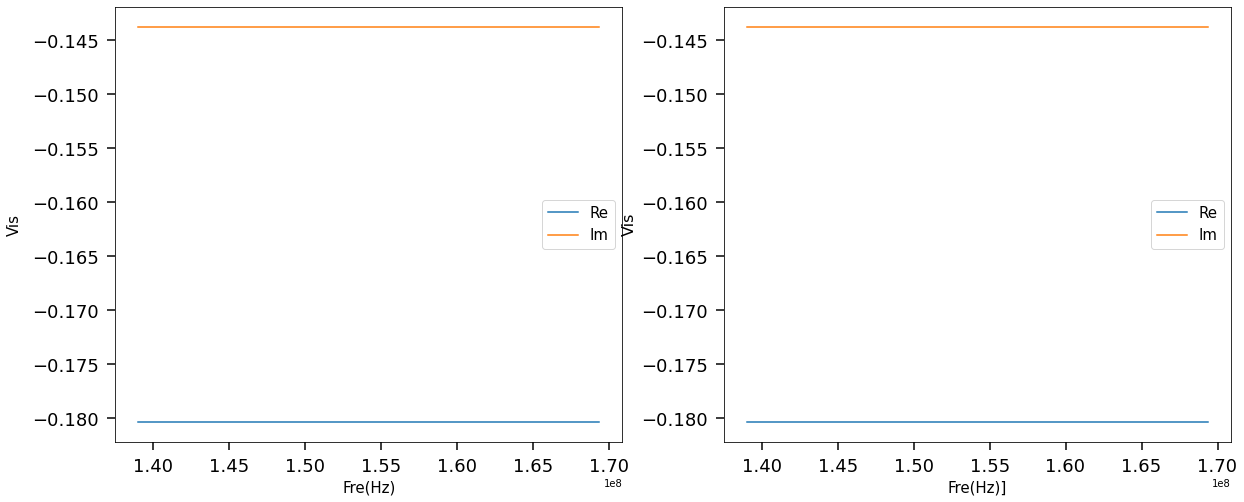

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

freqs = (idx - pix) * delta + mfreq

bl = 30000; pol = 0
vis_allfreq_XX_re = dataT['DATA'][bl,0,0,0,:,pol,0] #array with 768R & 7C
vis_allfreq_XX_im = dataT['DATA'][bl,0,0,0,:,pol,1] #array with 768R & 7C
vis_allfreq_XX_wt = dataT['DATA'][bl,0,0,0,:,pol,2] 


vis_allfreq_XX_re = vis_allfreq_XX_re[vis_allfreq_XX_wt > 0.]
vis_allfreq_XX_im = vis_allfreq_XX_im[vis_allfreq_XX_wt > 0.]
freqs = freqs[vis_allfreq_XX_wt > 0.]

ax[0].plot(freqs,vis_allfreq_XX_re,label = 'Re')
ax[0].plot(freqs,vis_allfreq_XX_im, label = 'Im')

#ax[0].set_xlim([0.,np.rad2deg(1.)])
ax[0].set_ylabel('Vis', fontsize=15,labelpad=10)
#ax[0].text(1.40e8, -70,r'XX' + os.linesep + 'bl = 30000' + os.linesep + 'cutoff', fontsize=20)
ax[0].set_xlabel(r'Fre(Hz)', fontsize=15)
#ax[0].set_yscale('log')
ax[0].legend(fontsize=15)
ax[0].tick_params(axis='both', which='major', labelsize=18, size=8., width=1.5, pad=8.)
ax[0].tick_params(axis='both', which='minor', labelsize=18, size=5., width=1.5, pad=8.)

freqs = (idx - pix) * delta + mfreq
bl = 30000; pol = 1
vis_allfreq_XX_re = dataT['DATA'][bl,0,0,0,:,pol,0] #array with 768R & 7C
vis_allfreq_XX_im = dataT['DATA'][bl,0,0,0,:,pol,1] #array with 768R & 7C
vis_allfreq_XX_wt = dataT['DATA'][bl,0,0,0,:,pol,2] 


vis_allfreq_XX_re = vis_allfreq_XX_re[vis_allfreq_XX_wt > 0.]
vis_allfreq_XX_im = vis_allfreq_XX_im[vis_allfreq_XX_wt > 0.]
freqs = freqs[vis_allfreq_XX_wt > 0.]

ax[1].plot(freqs,vis_allfreq_XX_re,label = 'Re')
ax[1].plot(freqs,vis_allfreq_XX_im, label = 'Im')
#ax[1].text(1.40e8, -80,r'YY' + os.linesep + 'bl = 30000' + os.linesep + 'cutoff', fontsize=20)
ax[1].set_ylabel('Vis', fontsize=16)
ax[1].set_xlabel(r'Fre(Hz)]', fontsize=15)
#ax[1].set_yscale('log')
ax[1].legend(fontsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=18, size=8., width=1.5, pad=8.)
ax[1].tick_params(axis='both', which='minor', labelsize=18, size=5., width=1.5, pad=8.)


'''freqs = (idx - pix) * delta + mfreq
bl = 30000; pol = 2
vis_allfreq_XX_re = dataT['DATA'][bl,0,0,0,:,pol,0] #array with 768R & 7C
vis_allfreq_XX_im = dataT['DATA'][bl,0,0,0,:,pol,1] #array with 768R & 7C
vis_allfreq_XX_wt = dataT['DATA'][bl,0,0,0,:,pol,2] 


vis_allfreq_XX_re = vis_allfreq_XX_re[vis_allfreq_XX_wt > 0.]
vis_allfreq_XX_im = vis_allfreq_XX_im[vis_allfreq_XX_wt > 0.]
freqs = freqs[vis_allfreq_XX_wt > 0.]

ax[1,0].plot(freqs,vis_allfreq_XX_re,label = 'Re')
ax[1,0].plot(freqs,vis_allfreq_XX_im, label = 'Im')

#ax[1,0].set_xlim([0.,np.rad2deg(1.)])
ax[1,0].set_ylabel('Vis', fontsize=15,labelpad=10)
#ax[1,0].text(2, 0.5e-3,r'Symmetric beam', fontsize=20)
ax[1,0].set_xlabel(r'Freq(Hz)', fontsize=15)
#ax[1,0].set_yscale('log')
ax[1,0].legend(fontsize=15)
ax[1,0].tick_params(axis='both', which='major', labelsize=18, size=8., width=1.5, pad=8.)
ax[1,0].tick_params(axis='both', which='minor', labelsize=18, size=5., width=1.5, pad=8.)


freqs = (idx - pix) * delta + mfreq
bl = 30000; pol = 3
vis_allfreq_XX_re = dataT['DATA'][bl,0,0,0,:,pol,0] #array with 768R & 7C
vis_allfreq_XX_im = dataT['DATA'][bl,0,0,0,:,pol,1] #array with 768R & 7C
vis_allfreq_XX_wt = dataT['DATA'][bl,0,0,0,:,pol,2] 


vis_allfreq_XX_re = vis_allfreq_XX_re[vis_allfreq_XX_wt > 0.]
vis_allfreq_XX_im = vis_allfreq_XX_im[vis_allfreq_XX_wt > 0.]
freqs = freqs[vis_allfreq_XX_wt > 0.]


ax[1,1].plot(freqs,vis_allfreq_XX_re,label = 'Re')
ax[1,1].plot(freqs,vis_allfreq_XX_im, label = 'Im')

#ax[1,1].set_xlim([0.,np.rad2deg(1.)])
ax[1,1].set_ylabel('Vis', fontsize=15,labelpad=10)
#ax[1,1].text(2, 0.5e-3,r'Symmetric beam', fontsize=20)
ax[1,1].set_xlabel(r'Freq(Hz)', fontsize=15)
#ax[1,1].set_yscale('log')
ax[1,1].legend(fontsize=15)
ax[1,1].tick_params(axis='both', which='major', labelsize=18, size=8., width=1.5, pad=8.)
ax[1,1].tick_params(axis='both', which='minor', labelsize=18, size=5., width=1.5, pad=8.)'''

plt.savefig('bl = 30000; cutoff.pdf',bbox_inches='tight')

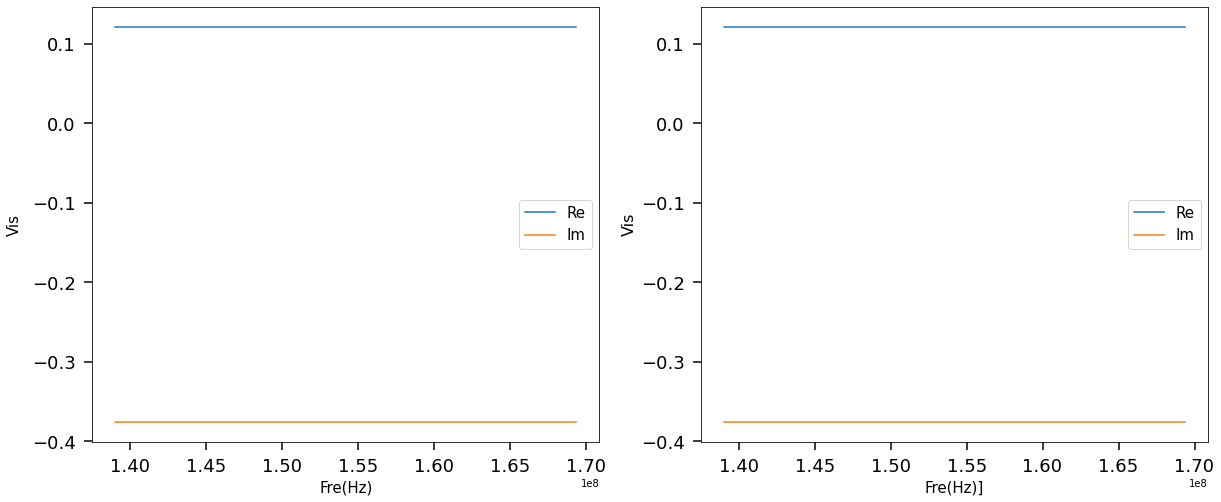

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

freqs = (idx - pix) * delta + mfreq

bl = 60000; pol = 0
vis_allfreq_XX_re = dataT['DATA'][bl,0,0,0,:,pol,0] #array with 768R & 7C
vis_allfreq_XX_im = dataT['DATA'][bl,0,0,0,:,pol,1] #array with 768R & 7C
vis_allfreq_XX_wt = dataT['DATA'][bl,0,0,0,:,pol,2] 


vis_allfreq_XX_re = vis_allfreq_XX_re[vis_allfreq_XX_wt > 0.]
vis_allfreq_XX_im = vis_allfreq_XX_im[vis_allfreq_XX_wt > 0.]
freqs = freqs[vis_allfreq_XX_wt > 0.]

ax[0].plot(freqs,vis_allfreq_XX_re,label = 'Re')
ax[0].plot(freqs,vis_allfreq_XX_im, label = 'Im')

#ax[0].set_xlim([0.,np.rad2deg(1.)])
ax[0].set_ylabel('Vis', fontsize=15,labelpad=10)
#ax[0].text(1.50e8, -145,r'XX; bl = 60000; cutoff', fontsize=20)
ax[0].set_xlabel(r'Fre(Hz)', fontsize=15)
#ax[0].set_yscale('log')
ax[0].legend(fontsize=15)
ax[0].tick_params(axis='both', which='major', labelsize=18, size=8., width=1.5, pad=8.)
ax[0].tick_params(axis='both', which='minor', labelsize=18, size=5., width=1.5, pad=8.)

freqs = (idx - pix) * delta + mfreq
bl = 60000; pol = 1
vis_allfreq_XX_re = dataT['DATA'][bl,0,0,0,:,pol,0] #array with 768R & 7C
vis_allfreq_XX_im = dataT['DATA'][bl,0,0,0,:,pol,1] #array with 768R & 7C
vis_allfreq_XX_wt = dataT['DATA'][bl,0,0,0,:,pol,2] 


vis_allfreq_XX_re = vis_allfreq_XX_re[vis_allfreq_XX_wt > 0.]
vis_allfreq_XX_im = vis_allfreq_XX_im[vis_allfreq_XX_wt > 0.]
freqs = freqs[vis_allfreq_XX_wt > 0.]

ax[1].plot(freqs,vis_allfreq_XX_re,label = 'Re')
ax[1].plot(freqs,vis_allfreq_XX_im, label = 'Im')
#ax[1].text(1.48e8, -145,r'YY; bl = 60000; cutoff', fontsize=20)
ax[1].set_ylabel('Vis', fontsize=16)
ax[1].set_xlabel(r'Fre(Hz)]', fontsize=15)
#ax[1].set_yscale('log')
ax[1].legend(fontsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=18, size=8., width=1.5, pad=8.)
ax[1].tick_params(axis='both', which='minor', labelsize=18, size=5., width=1.5, pad=8.)



plt.savefig('bl = 60000; cutoff.pdf',bbox_inches='tight')

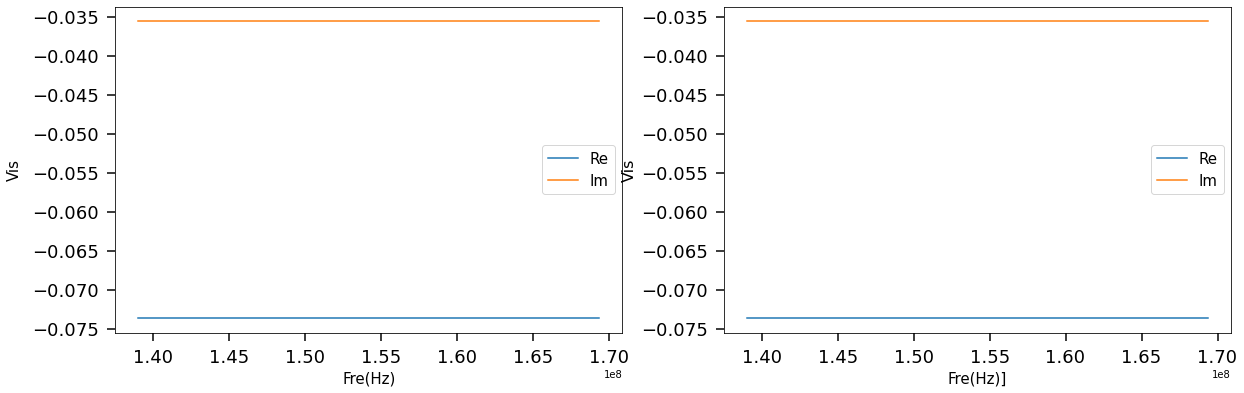

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

freqs = (idx - pix) * delta + mfreq

bl = 20000; pol = 0
vis_allfreq_XX_re = dataT['DATA'][bl,0,0,0,:,pol,0] #array with 768R & 7C
vis_allfreq_XX_im = dataT['DATA'][bl,0,0,0,:,pol,1] #array with 768R & 7C
vis_allfreq_XX_wt = dataT['DATA'][bl,0,0,0,:,pol,2] 


vis_allfreq_XX_re = vis_allfreq_XX_re[vis_allfreq_XX_wt > 0.]
vis_allfreq_XX_im = vis_allfreq_XX_im[vis_allfreq_XX_wt > 0.]
freqs = freqs[vis_allfreq_XX_wt > 0.]

ax[0].plot(freqs,vis_allfreq_XX_re,label = 'Re')
ax[0].plot(freqs,vis_allfreq_XX_im, label = 'Im')

#ax[0].set_xlim([0.,np.rad2deg(1.)])
ax[0].set_ylabel('Vis', fontsize=15,labelpad=10)
#ax[0].text(1.50e8, -150,r'XX ; bl = 20000' + os.linesep + 'cutoff', fontsize=20)
ax[0].set_xlabel(r'Fre(Hz)', fontsize=15)
#ax[0].set_yscale('log')
ax[0].legend(fontsize=15)
ax[0].tick_params(axis='both', which='major', labelsize=18, size=8., width=1.5, pad=8.)
ax[0].tick_params(axis='both', which='minor', labelsize=18, size=5., width=1.5, pad=8.)

freqs = (idx - pix) * delta + mfreq
bl = 20000; pol = 1
vis_allfreq_XX_re = dataT['DATA'][bl,0,0,0,:,pol,0] #array with 768R & 7C
vis_allfreq_XX_im = dataT['DATA'][bl,0,0,0,:,pol,1] #array with 768R & 7C
vis_allfreq_XX_wt = dataT['DATA'][bl,0,0,0,:,pol,2] 


vis_allfreq_XX_re = vis_allfreq_XX_re[vis_allfreq_XX_wt > 0.]
vis_allfreq_XX_im = vis_allfreq_XX_im[vis_allfreq_XX_wt > 0.]
freqs = freqs[vis_allfreq_XX_wt > 0.]

ax[1].plot(freqs,vis_allfreq_XX_re,label = 'Re')
ax[1].plot(freqs,vis_allfreq_XX_im, label = 'Im')
#ax[1].text(1.50e8, -200,r'YY ; bl = 20000' + os.linesep + 'cutoff', fontsize=20)
ax[1].set_ylabel('Vis', fontsize=16)
ax[1].set_xlabel(r'Fre(Hz)]', fontsize=15)
#ax[1].set_yscale('log')
ax[1].legend(fontsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=18, size=8., width=1.5, pad=8.)
ax[1].tick_params(axis='both', which='minor', labelsize=18, size=5., width=1.5, pad=8.)


'''
freqs = (idx - pix) * delta + mfreq
bl = 20000; pol = 2
vis_allfreq_XX_re = dataT['DATA'][bl,0,0,0,:,pol,0] #array with 768R & 7C
vis_allfreq_XX_im = dataT['DATA'][bl,0,0,0,:,pol,1] #array with 768R & 7C
vis_allfreq_XX_wt = dataT['DATA'][bl,0,0,0,:,pol,2] 


vis_allfreq_XX_re = vis_allfreq_XX_re[vis_allfreq_XX_wt > 0.]
vis_allfreq_XX_im = vis_allfreq_XX_im[vis_allfreq_XX_wt > 0.]
freqs = freqs[vis_allfreq_XX_wt > 0.]

ax[1,0].plot(freqs,vis_allfreq_XX_re,label = 'Re')
ax[1,0].plot(freqs,vis_allfreq_XX_im, label = 'Im')

#ax[1,0].set_xlim([0.,np.rad2deg(1.)])
ax[1,0].set_ylabel('Vis', fontsize=15,labelpad=10)
#ax[1,0].text(2, 0.5e-3,r'Symmetric beam', fontsize=20)
ax[1,0].set_xlabel(r'Freq(Hz)', fontsize=15)
#ax[1,0].set_yscale('log')
ax[1,0].legend(fontsize=15)
ax[1,0].tick_params(axis='both', which='major', labelsize=18, size=8., width=1.5, pad=8.)
ax[1,0].tick_params(axis='both', which='minor', labelsize=18, size=5., width=1.5, pad=8.)


freqs = (idx - pix) * delta + mfreq
bl = 20000; pol = 3
vis_allfreq_XX_re = dataT['DATA'][bl,0,0,0,:,pol,0] #array with 768R & 7C
vis_allfreq_XX_im = dataT['DATA'][bl,0,0,0,:,pol,1] #array with 768R & 7C
vis_allfreq_XX_wt = dataT['DATA'][bl,0,0,0,:,pol,2] 


vis_allfreq_XX_re = vis_allfreq_XX_re[vis_allfreq_XX_wt > 0.]
vis_allfreq_XX_im = vis_allfreq_XX_im[vis_allfreq_XX_wt > 0.]
freqs = freqs[vis_allfreq_XX_wt > 0.]


ax[1,1].plot(freqs,vis_allfreq_XX_re,label = 'Re')
ax[1,1].plot(freqs,vis_allfreq_XX_im, label = 'Im')

#ax[1,1].set_xlim([0.,np.rad2deg(1.)])
ax[1,1].set_ylabel('Vis', fontsize=15,labelpad=10)
#ax[1,1].text(2, 0.5e-3,r'Symmetric beam', fontsize=20)
ax[1,1].set_xlabel(r'Freq(Hz)', fontsize=15)
#ax[1,1].set_yscale('log')
ax[1,1].legend(fontsize=15)
ax[1,1].tick_params(axis='both', which='major', labelsize=18, size=8., width=1.5, pad=8.)
ax[1,1].tick_params(axis='both', which='minor', labelsize=18, size=5., width=1.5, pad=8.)'''

plt.savefig('bl = 20000; cutoff.pdf',bbox_inches='tight')

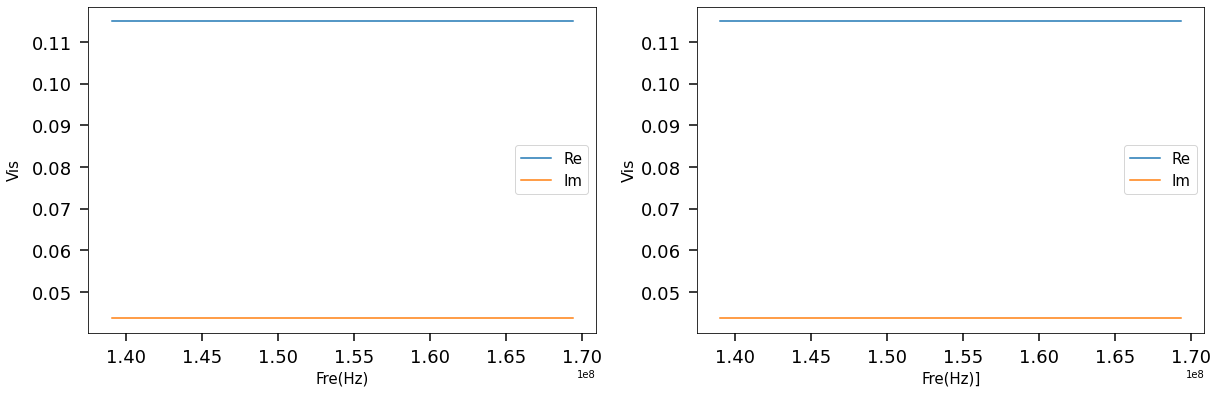

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

freqs = (idx - pix) * delta + mfreq

bl = 1000; pol = 0
vis_allfreq_XX_re = dataT['DATA'][bl,0,0,0,:,pol,0] #array with 768R & 7C
vis_allfreq_XX_im = dataT['DATA'][bl,0,0,0,:,pol,1] #array with 768R & 7C
vis_allfreq_XX_wt = dataT['DATA'][bl,0,0,0,:,pol,2] 


vis_allfreq_XX_re = vis_allfreq_XX_re[vis_allfreq_XX_wt > 0.]
vis_allfreq_XX_im = vis_allfreq_XX_im[vis_allfreq_XX_wt > 0.]
freqs = freqs[vis_allfreq_XX_wt > 0.]

ax[0].plot(freqs,vis_allfreq_XX_re,label = 'Re')
ax[0].plot(freqs,vis_allfreq_XX_im, label = 'Im')

#ax[0].set_xlim([0.,np.rad2deg(1.)])
ax[0].set_ylabel('Vis', fontsize=15,labelpad=10)
#ax[0].text(1.455e8, -150,r'XX ; bl = 1000' + os.linesep + 'cutoff', fontsize=20)
ax[0].set_xlabel(r'Fre(Hz)', fontsize=15)
#ax[0].set_yscale('log')
ax[0].legend(fontsize=15)
ax[0].tick_params(axis='both', which='major', labelsize=18, size=8., width=1.5, pad=8.)
ax[0].tick_params(axis='both', which='minor', labelsize=18, size=5., width=1.5, pad=8.)

freqs = (idx - pix) * delta + mfreq
bl = 1000; pol = 1
vis_allfreq_XX_re = dataT['DATA'][bl,0,0,0,:,pol,0] #array with 768R & 7C
vis_allfreq_XX_im = dataT['DATA'][bl,0,0,0,:,pol,1] #array with 768R & 7C
vis_allfreq_XX_wt = dataT['DATA'][bl,0,0,0,:,pol,2] 


vis_allfreq_XX_re = vis_allfreq_XX_re[vis_allfreq_XX_wt > 0.]
vis_allfreq_XX_im = vis_allfreq_XX_im[vis_allfreq_XX_wt > 0.]
freqs = freqs[vis_allfreq_XX_wt > 0.]

ax[1].plot(freqs,vis_allfreq_XX_re,label = 'Re')
ax[1].plot(freqs,vis_allfreq_XX_im, label = 'Im')
#ax[1].text(1.455e8, -110,r'YY ; bl = 1000' + os.linesep + 'cutoff', fontsize=20)
ax[1].set_ylabel('Vis', fontsize=16)
ax[1].set_xlabel(r'Fre(Hz)]', fontsize=15)
#ax[1].set_yscale('log')
ax[1].legend(fontsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=18, size=8., width=1.5, pad=8.)
ax[1].tick_params(axis='both', which='minor', labelsize=18, size=5., width=1.5, pad=8.)
plt.savefig('bl = 1000; cutoff.pdf',bbox_inches='tight')

In [32]:
time = hdulist[0].header['DATE-OBS']

In [33]:
print(time)

2016-10-12T16:42:03.999999
